In [47]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
df = pd.read_csv('crime_data.csv')

In [49]:
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [50]:
df = df.fillna(0)
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [51]:
df.head()

,jurisdiction,year,population,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.4,-41.8,-11.6,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.4,49.2,4.5,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.0,-17.5,0.0,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.3,8.2,9.4,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


In [52]:
df.rename(columns={'agg_assault':'Aggravated Assault','b_e':'Breaking & Entering', 'm_v_theft':'Motor Vehicle Theft'}, inplace=True)

In [53]:

selected_features = ['murder', 'rape', 'robbery', 'Aggravated Assault', 'Breaking & Entering', 'larceny_theft', 'Motor Vehicle Theft']

df_selected = df[df['year'].between(2010, 2020)][selected_features]

# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)
df_normalized




array([[-0.2717248 , -0.40726822, -0.38840949, ..., -0.29630202,
        -0.4113677 , -0.42529564],
       [-0.23715355, -0.36595852, -0.37362696, ..., -0.28932145,
        -0.421046  , -0.43021461],
       [-0.28901042, -0.44857791, -0.39474486, ..., -0.31084489,
        -0.41435918, -0.41053872],
       ...,
       [-0.3408673 , -0.55185215, -0.41375098, ..., -0.51793526,
        -0.54211272, -0.43759308],
       [-0.3408673 , -0.55185215, -0.41375098, ..., -0.53480498,
        -0.55830188, -0.44087239],
       [-0.32358168, -0.3556311 , -0.39791255, ..., -0.53305984,
        -0.55847785, -0.44251205]])

In [54]:

num_components = 7  # You can choose the number based on the explained variance you want to retain

# Apply PCA
pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df_normalized)

# Create a DataFrame with the principal components
columns = [f'PC{i + 1}' for i in range(num_components)]
df_pca = pd.DataFrame(df_pca, columns=columns)

# Concatenate the principal components with the original DataFrame if needed
df_final = pd.concat([df_selected.reset_index(drop=True), df_pca], axis=1)

# Now df_final contains the original columns along with the principal components


In [55]:
df_final


,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,4,26,48,234,596,1921,49,-0.974351,0.103369,0.019193,-0.051434,0.031476,-0.072668,-0.054334
1,6,30,62,153,608,1866,43,-0.972154,0.105443,-0.009853,0.006127,0.017430,-0.135308,-0.059065
2,3,22,42,201,571,1904,67,-1.010032,0.111491,0.056576,-0.035229,0.016046,-0.065062,-0.049627
3,4,28,63,154,547,1787,54,-1.006619,0.104066,0.000963,0.011418,0.015942,-0.102484,-0.031806
4,2,15,31,153,550,1787,42,-1.082986,0.140506,0.098465,-0.040143,-0.001359,-0.077881,-0.047061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,3,17,39,93,289,1514,32,-1.167151,0.166666,0.008187,0.036148,-0.062197,-0.033003,-0.008003
260,2,26,43,106,220,1514,39,-1.148084,0.113011,-0.064264,0.067679,-0.049507,-0.011207,0.016642
261,0,12,24,88,215,1178,34,-1.249902,0.189290,0.029509,0.039910,-0.038541,0.008096,0.021995
262,0,12,24,94,186,1086,30,-1.261676,0.198790,0.016372,0.041551,-0.034983,0.019377,0.028392


In [56]:
explained_variance = pca.explained_variance_ratio_
explained_variance = np.insert(explained_variance, 0, 0)
explained_variance

array([0.        , 0.86928184, 0.07056138, 0.03612359, 0.01463839,
       0.00399428, 0.00354674, 0.00185379])

In [58]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
cumulative_variance

array([0.   , 0.869, 0.94 , 0.976, 0.991, 0.995, 0.999, 1.001])

In [59]:
pc_df = pd.DataFrame([' ','PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance


,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.869282,0.869
2,PC2,0.070561,0.940
3,PC3,0.036124,0.976
4,PC4,0.014638,0.991
5,PC5,0.003994,0.995
6,PC6,0.003547,0.999
7,PC7,0.001854,1.001


The explained variance for each principal component indicates the proportion of variance in the original data captured by that component. In your case, the first principal component (PC1) explains about 86.9% of the variance, and the cumulative variance shows that the first two principal components (PC1 and PC2) together explain around 94% of the variance. This suggests that you can potentially reduce the dimensionality of your dataset by keeping only the most informative principal components. This can lead to more efficient computations and visualizations.

In [60]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')  
fig.show()


In [61]:
#Plotting Explained Variance + Cumalative Variance

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.update_layout(title_text="Cumulative Variance and Explained Variance for all PCA components")


fig.show()

In [62]:
#Seperately plotting Explained Variance and Cumalative Variance
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1 # scatter plot 
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2  # bar chart
    )
fig.update_layout(title_text="Cumulative Variance vs Explained Variance for all PCA components")

fig.show()

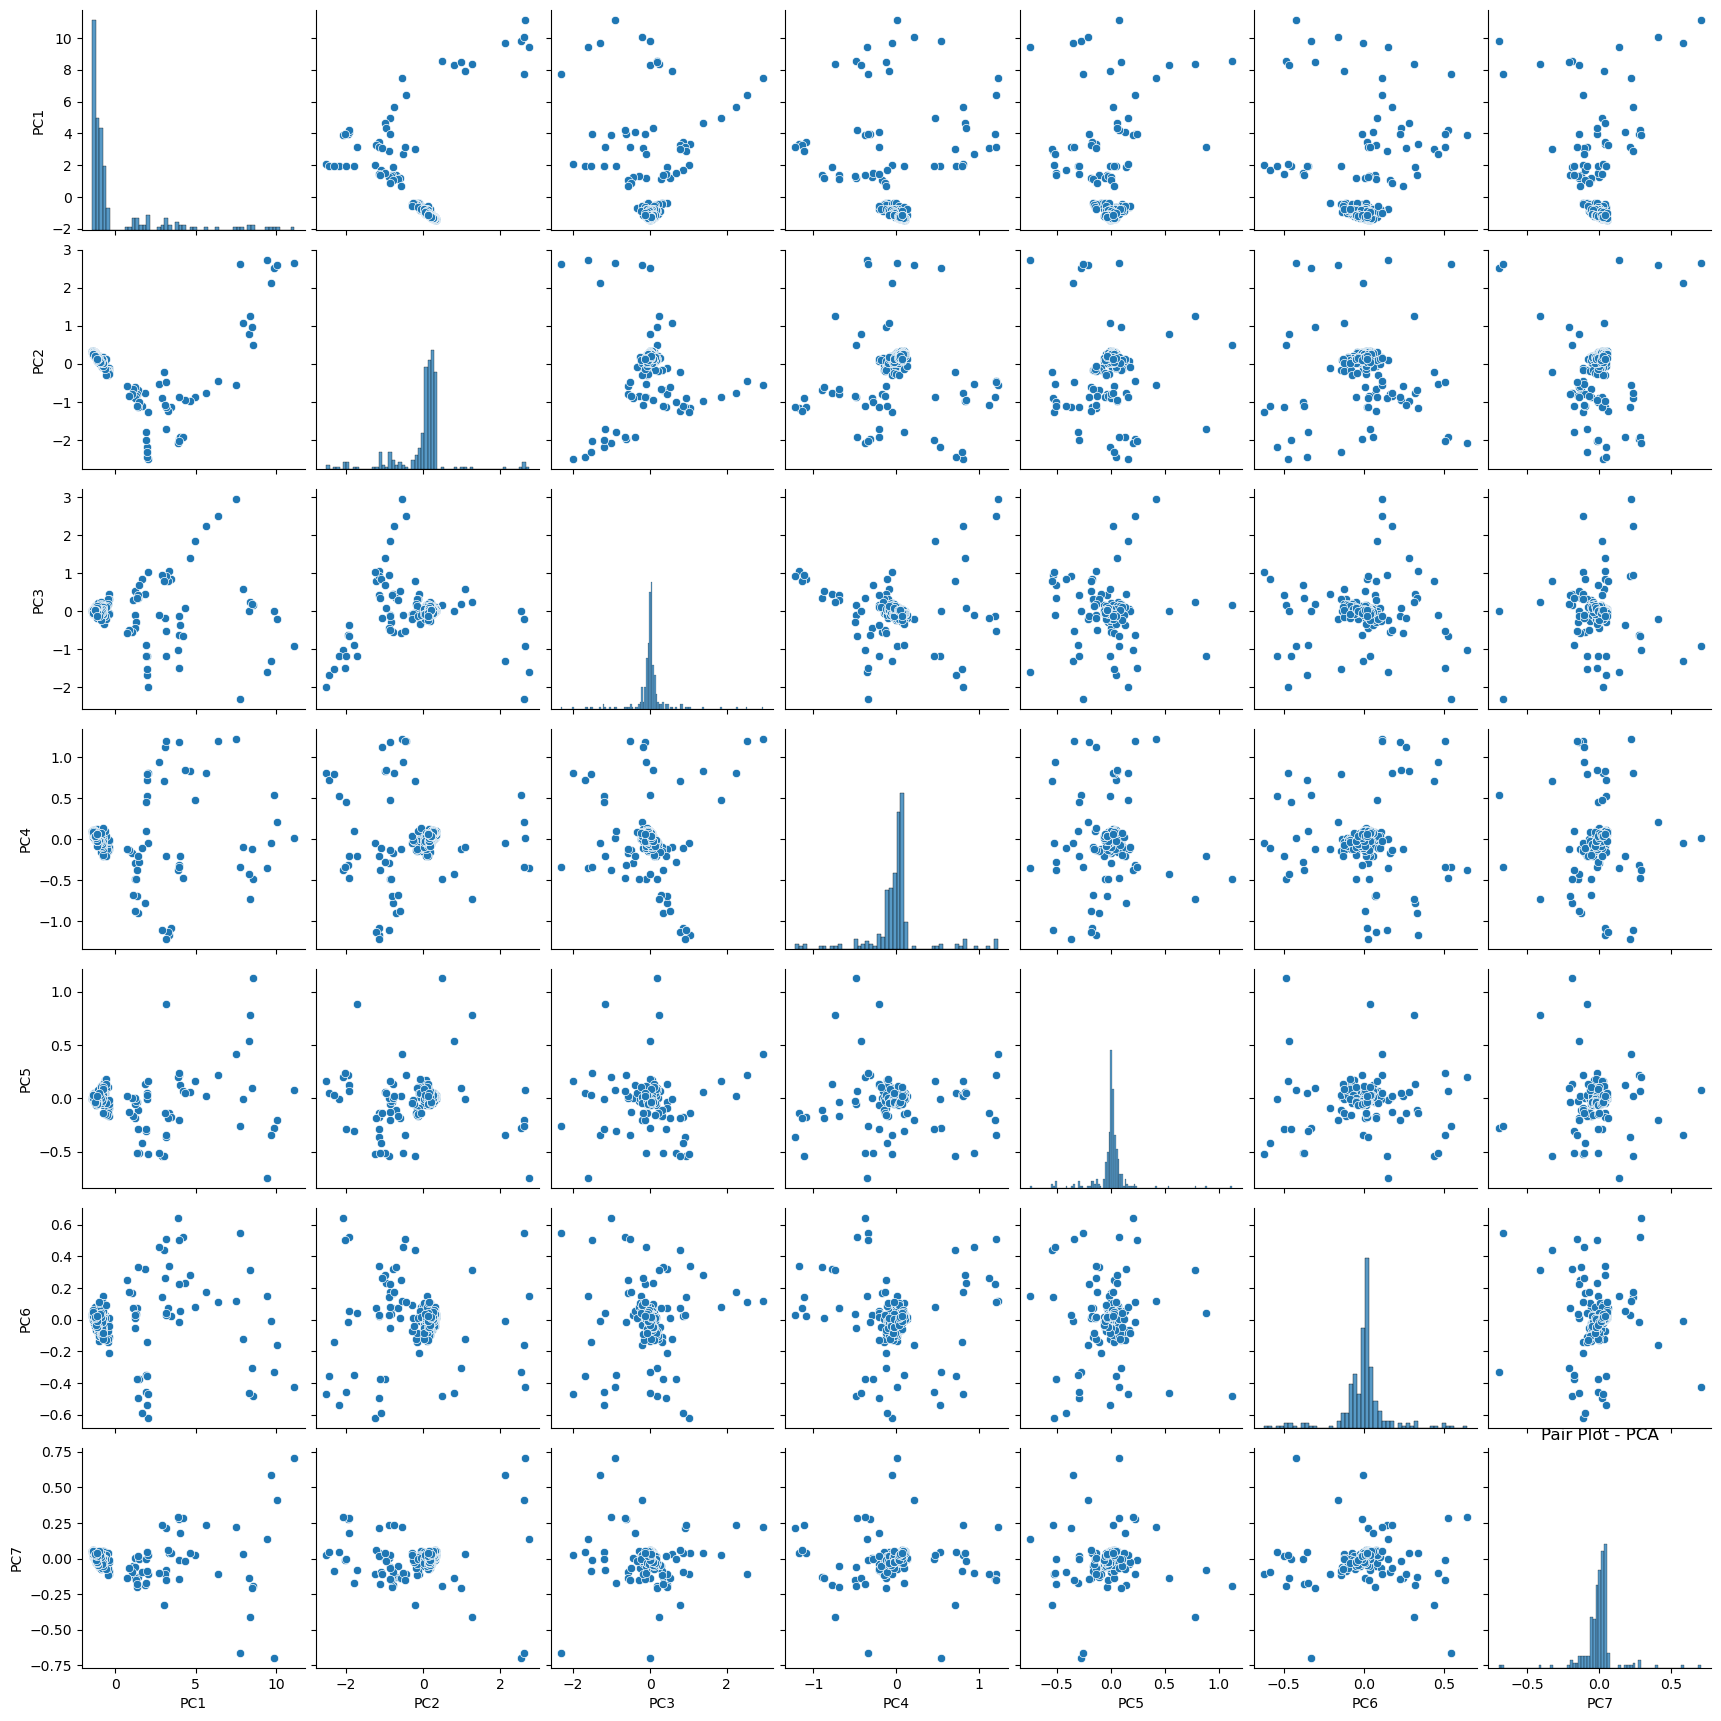

In [70]:
import seaborn as sns

# Assuming df_pca has more than 3 principal components
sns.pairplot(df_pca)
plt.title('Pair Plot - PCA')
plt.show()



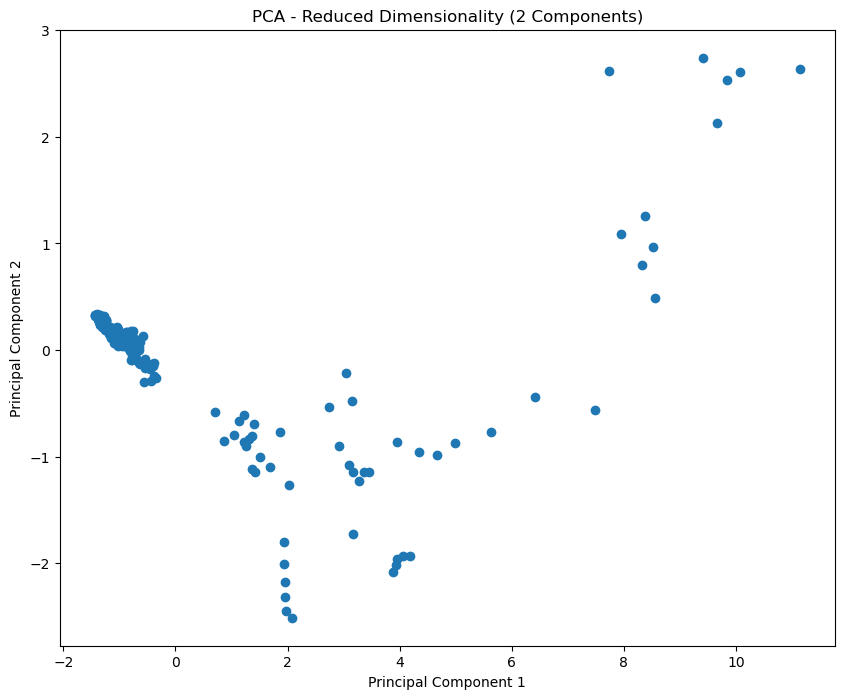

In [74]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Dimensionality (2 Components)')
plt.show()
